In [139]:
import sklearn
print(sklearn.__version__)

1.5.0


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [141]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
df = pd.read_csv("/content/drive/MyDrive/Data/churn-bigml-80.csv")

In [143]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Features:
- State: Mã bang hoặc khu vực của khách hàng. Đây là một biến định danh (categorical) có thể được sử dụng để phân tích sự khác biệt về churn theo khu vực địa lý.
- Account length: Thời gian khách hàng đã sử dụng dịch vụ tính bằng số ngày. Đây là một biến số (numerical) có thể ảnh hưởng đến khả năng khách hàng rời bỏ
- Area code: Mã vùng của khách hàng. Đây cũng là một biến định danh có thể được sử dụng để xem xét ảnh hưởng của vùng địa lý đến churn.
- International plan: Khách hàng có đăng ký gói dịch vụ quốc tế hay không. Đây là một biến nhị phân (binary) với hai giá trị: 'yes' hoặc 'no'.
- Voice mail plan: Khách hàng có đăng ký gói dịch vụ hộp thư thoại hay không. Đây là một biến nhị phân với hai giá trị: 'yes' hoặc 'no'.
- Number vmail messages: Số lượng tin nhắn hộp thư thoại mà khách hàng đã nhận được. Đây là một biến số có thể liên quan đến việc sử dụng dịch vụ.
- Total day minutes: Tổng số phút gọi trong ngày. Đây là một biến số đại diện cho mức độ sử dụng dịch vụ trong thời gian ban ngày.
- Total day calls: Tổng số cuộc gọi trong ngày. Đây là một biến số khác liên quan đến tần suất sử dụng dịch vụ ban ngày.
- Total day charge: Tổng chi phí cho các cuộc gọi ban ngày. Đây là một biến số tính toán từ tổng số phút gọi trong ngày, thường là một yếu tố quan trọng trong phân tích churn.
- Total eve minutes: Tổng số phút gọi buổi tối. Đây là một biến số đại diện cho mức độ sử dụng dịch vụ vào buổi tối.
- Total eve calls: Tổng số cuộc gọi buổi tối. Đây là một biến số khác liên quan đến tần suất sử dụng dịch vụ buổi tối.
- Total eve charge: Tổng chi phí cho các cuộc gọi buổi tối. Đây là một biến số tính toán từ tổng số phút gọi buổi tối.
- Total night minutes: Tổng số phút gọi ban đêm. Đây là một biến số đại diện cho mức độ sử dụng dịch vụ vào ban đêm.
- Total night calls: Tổng số cuộc gọi ban đêm. Đây là một biến số khác liên quan đến tần suất sử dụng dịch vụ ban đêm.
- Total night charge: Tổng chi phí cho các cuộc gọi ban đêm. Đây là một biến số tính toán từ tổng số phút gọi ban đêm.
- Total intl minutes: Tổng số phút gọi quốc tế. Đây là một biến số đại diện cho mức độ sử dụng dịch vụ quốc tế.
- Total intl calls: Tổng số cuộc gọi quốc tế. Đây là một biến số khác liên quan đến tần suất sử dụng dịch vụ quốc tế.
- Total intl charge: Tổng chi phí cho các cuộc gọi quốc tế. Đây là một biến số tính toán từ tổng số phút gọi quốc tế.
- Customer service calls: Số lượng cuộc gọi của khách hàng đến bộ phận chăm sóc khách hàng. Đây là một biến số quan trọng, thường liên quan đến mức độ hài lòng của khách hàng.
- Churn: Biến đích (target variable) chỉ ra liệu khách hàng có rời bỏ dịch vụ hay không. Đây là một biến nhị phân với hai giá trị: 'yes' (rời bỏ) hoặc 'no' (không rời bỏ).

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Note: Không có dữ liệu nào bị trống và các định dạng dữ liệu đều đúng

In [145]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [146]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [147]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
string_columns = df.select_dtypes(include=[object]).columns.tolist()

In [148]:
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound))[0]
    return outliers

In [149]:
def detect_outliers_iqrhaizz(data):
    outliers_iqr = detect_outliers_iqr(data)
    for col, values in outliers_iqr.items():
      print(f"{col}:")
      print("  Count:", len(values))
      print("  Outliers:", values.tolist())

In [150]:
detect_outliers_iqrhaizz(df[numeric_columns])

Account length:
  Count: 12
  Outliers: [246, 338, 644, 864, 1092, 1231, 1385, 1496, 1722, 1818, 1833, 2578]
Area code:
  Count: 0
  Outliers: []
Number vmail messages:
  Count: 2
  Outliers: [2188, 2323]
Total day minutes:
  Count: 21
  Outliers: [128, 296, 485, 540, 582, 780, 833, 1057, 1100, 1285, 1333, 1575, 1612, 1698, 1812, 1949, 2087, 2206, 2218, 2442, 2548]
Total day calls:
  Count: 18
  Outliers: [252, 544, 581, 836, 1040, 1057, 1058, 1100, 1119, 1151, 1481, 1782, 1932, 1934, 2008, 2321, 2322, 2380]
Total day charge:
  Count: 21
  Outliers: [128, 296, 485, 540, 582, 780, 833, 1057, 1100, 1285, 1333, 1575, 1612, 1698, 1812, 1949, 2087, 2206, 2218, 2442, 2548]
Total eve minutes:
  Count: 17
  Outliers: [6, 27, 429, 465, 472, 647, 671, 704, 835, 938, 1269, 1555, 1731, 2054, 2202, 2358, 2467]
Total eve calls:
  Count: 15
  Outliers: [126, 382, 760, 808, 991, 1280, 1353, 1369, 1469, 1792, 2298, 2358, 2507, 2533, 2581]
Total eve charge:
  Count: 17
  Outliers: [6, 27, 429, 465, 472,

In [151]:
def replace_outliers_with_mean(data, outliers, columns):
    for col in columns:
        mean = data[col].mean()
        for row in outliers:
            if data.at[row, col] < data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)) or \
               data.at[row, col] > data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)):
                data.at[row, col] = mean
    return data

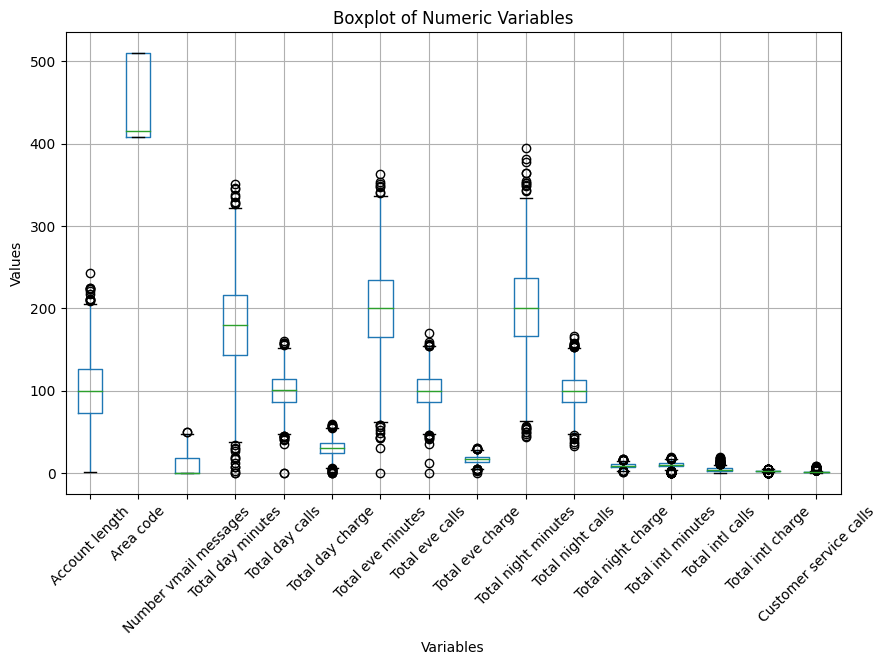

In [152]:
plt.figure(figsize=(10, 6))
df[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [153]:
def check_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

In [154]:
check_unique_values(df[string_columns])

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
Unique values in column 'International plan': ['No' 'Yes']
Unique values in column 'Voice mail plan': ['Yes' 'No']


<ipython-input-155-be1c5ed4f1ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


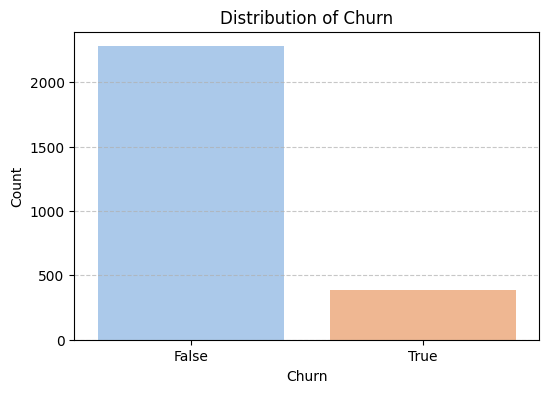

In [155]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [156]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})

In [157]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [158]:
from sklearn.preprocessing import OneHotEncoder
state_column = df[['State']]
encoder = OneHotEncoder()
state_encoded = encoder.fit_transform(state_column)

In [159]:
import joblib
joblib.dump(encoder, '/content/drive/MyDrive/Data/state_encoder.pkl')

['/content/drive/MyDrive/Data/state_encoder.pkl']

In [160]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [161]:
state_encoded

<2666x51 sparse matrix of type '<class 'numpy.float64'>'
	with 2666 stored elements in Compressed Sparse Row format>

In [162]:
state_encoded_columns = encoder.get_feature_names_out(['State'])

state_encoded_df = pd.DataFrame(state_encoded.toarray(), columns=state_encoded_columns[:])
df = df.drop('State', axis=1)
df = pd.concat([df, state_encoded_df], axis=1)

In [163]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [165]:
!pip install scikeras

In [166]:
X.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'S

In [167]:
columns_to_scale = X.columns[:18]

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale)
    ], remainder='passthrough'  # Để lại các cột còn lại không thay đổi
)

# Tạo pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {
    'classifier__C': [0.1, 1, 10],  # Tham số điều chuẩn
    'classifier__penalty': ['l1', 'l2']  # Loại hình điều chuẩn
}


# Tạo GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=2, verbose=1)

# Huấn luyện pipeline trên dữ liệu huấn luyện
grid_search.fit(X, y)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2']},
             verbose=1)

In [169]:
accuracy = grid_search.score(X, y)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8683420855213804


In [170]:
df2 = pd.read_csv("/content/drive/MyDrive/Data/churn-bigml-20.csv")

In [171]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})
df2['Churn'] = df2['Churn'].map({True: 1, False: 0})

In [172]:
state_column = df2[['State']]
state_encoded2 = encoder.transform(state_column)

In [174]:
state_encoded_columns = encoder.get_feature_names_out(['State'])
state_encoded_df2 = pd.DataFrame(state_encoded2.toarray(), columns=state_encoded_columns)
df2 = df2.drop('State', axis=1)
df2 = pd.concat([df2, state_encoded_df2], axis=1)
X2 = df2.drop('Churn', axis=1)
y2 = df2['Churn']

In [175]:
accuracy2 = grid_search.score(X2, y2)
print("Accuracy on test set:", accuracy2)

Accuracy on test set: 0.8590704647676162


In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Hàm để xây dựng mô hình Keras
def build_model():
    model = Sequential([
        Dense(80, activation='relu', input_dim=X.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = build_model()
history = model.fit(X, y, epochs=150, batch_size=10,validation_data=(X2, y2))
# Tạo pipeline
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', KerasRegressor(build_fn=build_model, epochs=10, batch_size=32, verbose=1))
# ])

# # Huấn luyện pipeline trên dữ liệu huấn luyện
# pipeline.fit(X, y)

# # Đánh giá mô hình trên tập kiểm tra
# accuracy = pipeline.score(X, y)
# print("Accuracy on test set:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7785 - loss: 1.0410 - val_accuracy: 0.8891 - val_loss: 0.3704
Epoch 2/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8291 - loss: 0.5233 - val_accuracy: 0.8576 - val_loss: 0.5741
Epoch 3/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.5639 - val_accuracy: 0.8576 - val_loss: 0.3772
Epoch 4/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.4468 - val_accuracy: 0.8816 - val_loss: 0.3123
Epoch 5/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3710 - val_accuracy: 0.8726 - val_loss: 0.3288
Epoch 6/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.4061 - val_accuracy: 0.8831 - val_loss: 0.3446
Epoch 7/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3729 - val_accuracy: 0.8801 - val_loss: 0.3254
Epoch 8/150
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.4344 - val_accu

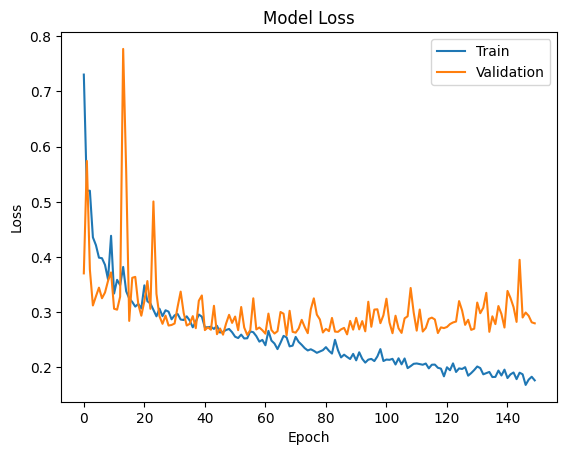

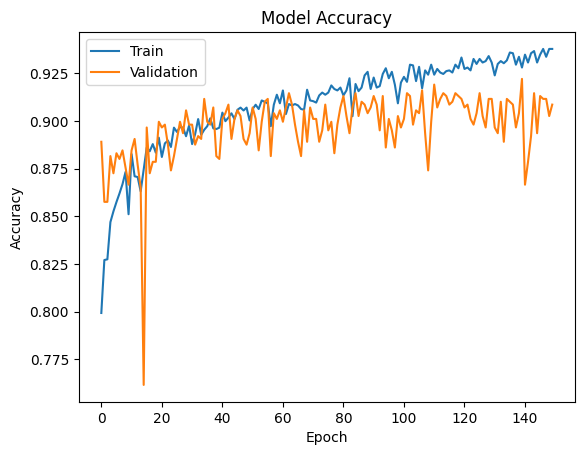

In [193]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Vẽ biểu đồ độ chính xác (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()